In [25]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Load the data
df = pd.read_csv('data/diets.csv')
df.head()

,gender,Age,Height,pre.weight,Diet,weight6weeks,kg_lost
0,0,22,159,58,1,54.2,3.8
1,0,46,192,60,1,54.0,6.0
2,0,55,170,64,1,63.3,0.7
3,0,33,171,64,1,61.1,2.9
4,0,50,170,65,1,62.2,2.8


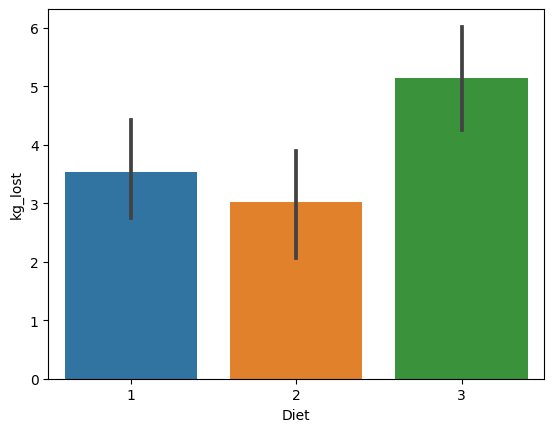

In [5]:
# Construct a barplot
sns.barplot(data = df, x = 'Diet', y = 'kg_lost');

In [12]:
# Make a dictionary of the groups
groups = {}
for i in df['Diet'].unique():
    groups[i] = df.loc[df['Diet'] == i, 'kg_lost'].copy()
groups.keys()

dict_keys([1, 2, 3])

In [18]:
# Test for normality
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {'n': len(data), 'p': p, 'test stat': stat}

norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
1,26.0,0.216027,3.064706
2,27.0,0.841993,0.343967
3,27.0,0.463144,1.539436


In [20]:
# Add a column for significance
alpha = 0.05
norm_results_df['sig'] = norm_results_df['p'] < alpha
norm_results_df

,n,p,test stat,sig
1,26.0,0.216027,3.064706,False
2,27.0,0.841993,0.343967,False
3,27.0,0.463144,1.539436,False


In [22]:
# Test for equal variance

# Test without * operator
print(stats.levene(groups[1], groups[2], groups[3]))

# Test with * operator
print(stats.levene(*groups.values()))

LeveneResult(statistic=0.30650755802082735, pvalue=0.7369067613743494)
LeveneResult(statistic=0.30650755802082735, pvalue=0.7369067613743494)


In [24]:
# Hypothesis test
stats.f_oneway(*groups.values())

F_onewayResult(statistic=5.679765022955312, pvalue=0.005001924377430895)

In [26]:
# Perform Tukey's pairwise test
tukeys_results = pairwise_tukeyhsd(df['kg_lost'], df['Diet'])
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.5125,0.7204,-2.0964,1.0713,False
1,3,1.6097,0.0455,0.0259,3.1935,True
2,3,2.1222,0.0051,0.5534,3.691,True
